Problem statement : Given a retinal image, the system could understand it and classify input image into one of the standard DR classes based on the severity.

#Diagnosis of Diabetic Retinopathy using  Deep Learning
                           
ANJALI AGARWAL B20AI051                       
DESIGN CREDIT PROJECT




In [ ]:
! pip install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.applications import Xception
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K
from keras.models import Sequential


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/<drivedata>


[Errno 2] No such file or directory: '/content/gdrive/MyDrive/<drivedata>'
/content


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

data_dir = '/content/gdrive/MyDrive/<your directory name>'

train_dir = os.path.join('/content/gdrive/MyDrive/training', 'train')
test_dir = os.path.join('/content/gdrive/MyDrive/test (1)', 'test')



In [ ]:
train_images_dir = os.path.join('/content/gdrive/MyDrive/training/images')
train_masks_dir = os.path.join('/content/gdrive/MyDrive/training/mask')
train_manual_dir = os.path.join('/content/gdrive/MyDrive/training/1st_manual')

test_images_dir = os.path.join('/content/gdrive/MyDrive/test (1)/images')
test_masks_dir = os.path.join('/content/gdrive/MyDrive/test (1)/mask')



In [ ]:
train_images_dir

'/content/gdrive/MyDrive/training/images'

In [ ]:
# Load training images and masks
train_images = []
train_masks = []
train_manuals = []

for filename in os.listdir(train_images_dir):
    if filename.endswith('.tif'):
        img_path = os.path.join(train_images_dir, filename)
        mask_path = os.path.join(train_masks_dir, filename.replace('.tif', '_mask.gif'))
        manual_path = os.path.join(train_manual_dir, filename.replace('_training.tif', '_manual1.gif'))
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        manual = Image.open(manual_path).convert('L')
        train_images.append(np.array(img))
        train_masks.append(np.array(mask))
        train_manuals.append(np.array(manual))

# Load test images and masks
test_images = []
test_masks = []

for filename in os.listdir(test_images_dir):
    if filename.endswith('.tif'):
        img_path = os.path.join(test_images_dir, filename)
        mask_path = os.path.join(test_masks_dir, filename.replace('.tif', '_mask.gif'))
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        test_images.append(np.array(img))
        test_masks.append(np.array(mask))

Training Image 1


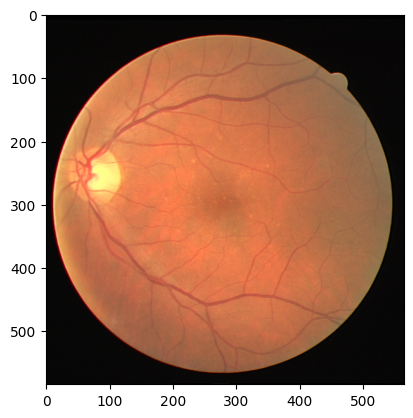

Training Mask 1


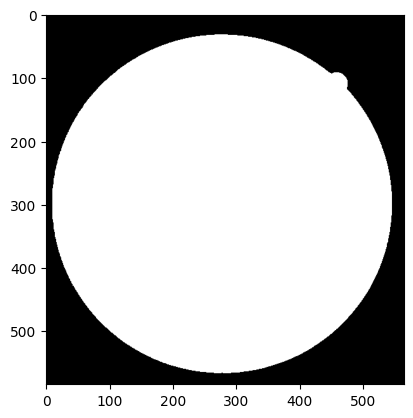

Training Manual 1


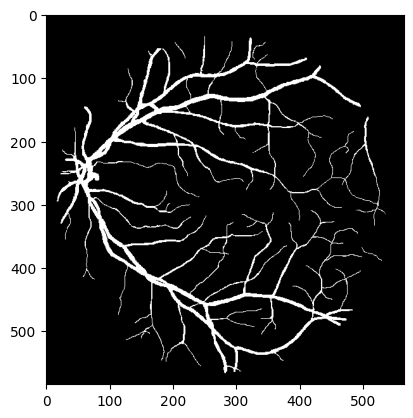

In [ ]:
from PIL import Image

# Print first 5 images from the training set
for i in range(1):
    img = Image.fromarray(train_images[i])
    mask = Image.fromarray(train_masks[i])
    manual = Image.fromarray(train_manuals[i])
    print(f'Training Image {i+1}')
    plt.imshow(img)
    plt.show()
    print(f'Training Mask {i+1}')
    plt.imshow(mask, cmap='gray')
    plt.show()
    print(f'Training Manual {i+1}')
    plt.imshow(manual, cmap='gray')
    plt.show()



Test Image 1


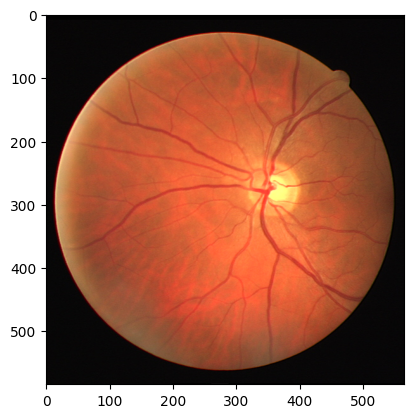

Test Mask 1


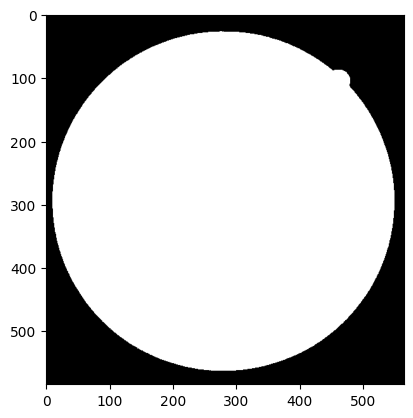

In [ ]:
# Print first 5 images from the test set
for i in range(1):
    img = Image.fromarray(test_images[i])
    mask = Image.fromarray(test_masks[i])
    print(f'Test Image {i+1}')
    plt.imshow(img)
    plt.show()
    print(f'Test Mask {i+1}')
    plt.imshow(mask, cmap='gray')
    plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image

# Define image size
img_width = 256
img_height = 256

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images and masks
train_images = train_images / 255.0
train_masks = train_masks / 255.0

# Reshape masks to add channel dimension
train_masks = np.reshape(train_masks, (train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))


In [ ]:
# Reshape the images and masks to have a single channel
train_images = np.reshape(train_images, (-1, 584, 565, 1))
train_masks = np.reshape(train_masks, (-1, 584, 565, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Perform data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)
train_datagen.fit(X_train)






ValueError: ignored

In [ ]:
X_train

In [ ]:
X_val

The class distribution is calculated by counting the number of pixels in the binary masks that belong to each class.

In the context of the diabetic retinopathy dataset you are working with, the binary masks indicate the location of regions with diabetic retinopathy in the retinal fundus images. The class 0.0 represents the absence of diabetic retinopathy, and the class 1.0 represents the presence of diabetic retinopathy.

To calculate the class distribution, you would need to count the number of pixels labeled as 0.0 and the number of pixels labeled as 1.0 in the binary masks of the dataset. This information may be available in the dataset documentation or may need to be calculated manually.

In [ ]:
classes, counts = np.unique(train_masks, return_counts=True)
print("Class distribution:")
for i in range(len(classes)):
    print("Class", classes[i], ":", counts[i])

Class distribution:
Class 0.0 : 2058194
Class 1.0 : 4541006


In [ ]:
X_train.shape

(12, 584, 565, 3)

In [ ]:
X_val.shape

(4, 584, 565, 3)

In [ ]:
y_train.shape

(12, 584, 565, 1)

In [ ]:
y_val.shape

(4, 584, 565, 1)

This class distribution indicates that there are two classes in the dataset. In this case, the classes correspond to the presence or absence of diabetic retinopathy in the retinal fundus photographs.

The class 0.0 represents the absence of diabetic retinopathy, and the class 1.0 represents the presence of diabetic retinopathy. The numbers in front of the classes indicate the number of pixels in the binary masks that belong to each class.





In [ ]:
# the squashing function.
# we use 0.5 in stead of 1 in hinton's paper.
# if 1, the norm of vector will be zoomed out.
# if 0.5, the norm will be zoomed in while original norm is less than 0.5
# and be zoomed out while original norm is greater than 0.5.
def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (0.5 + s_squared_norm)
    return scale * x

In [ ]:
# define our own softmax function instead of K.softmax
# because K.softmax can not specify axis.
def softmax(x, axis=-1):
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)

In [ ]:
# define the margin loss like hinge loss
def margin_loss(y_true, y_pred):
    lamb, margin = 0.5, 0.1 #default lambda 0.5 - but test with lambda with 0.9 - 0.1
    return K.sum(y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (
        1 - y_true) * K.square(K.relu(y_pred - margin)), axis=-1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(584, 565, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess the data
# You can use the preprocessing steps I described earlier to preprocess the data


In [ ]:

y_train = y_train.reshape(-1, 1)

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy}')


ValueError: ignored